# Lab 8: Parallel Computing in Python

- **Author:** Niall Keleher ([nkeleher@uw.edu](mailto:nkeleher@uw.edu))
- **Date:** 02 May 2016
- **Course:** INFO 371: Core Methods in Data Science

### Learning Objectives:
By the end of the lab, you will be able to:
* Understand and implement procedures for MapReduce
* Familiarize yourself with Neural Networks in Python

### Topics:
1. Map-Reduce
2. Neural Networks in Python

### References: 

* Joel Grus [Data Science from Scratch - mapReduce](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/mapreduce.py)
* yhat [Naive Bayes](http://blog.yhat.com/posts/naive-bayes-in-python.html)
* [MapReduce Tutorial](https://hadoop.apache.org/docs/r1.2.1/mapred_tutorial.html)

## MapReduce

Programming model for processing large datasets with a parallel, distributed algorithm on a cluster.
Introduced by Jeffrey Dean and Sanjay Ghemawhat 

In [1]:
from __future__ import division
import math, random, re, datetime, string
from collections import defaultdict, Counter
from functools import partial

Data Pre-processing

In [2]:
def remove_punctuation(text):
    table = string.maketrans("","")
    return text.translate(table, string.punctuation)

In [3]:
def tokenize(text):
    """Remove punctuation, set all words to lowercase and split document into word vector"""        
    text = remove_punctuation(text)
    text = text.lower()
    return re.split("\W+", text)

Mapper - high-order function that applies a function to each element of a list.

In [4]:
def wc_mapper(document):
    """for each word in the document, emit (word,1)"""        
    for word in tokenize(document):
        yield (word, 1)

Reducer - applies function to a given key to return calculated value

In [5]:
def wc_reducer(word, counts):
    """sum up the counts for a word"""
    yield (word, sum(counts))

In [6]:
def word_count(documents):
    """count the words in the input documents using MapReduce"""

    # place to store grouped values
    collector = defaultdict(list) 

    for document in documents:
        for word, count in wc_mapper(document):
            collector[word].append(count)

    return [output
            for word, counts in collector.iteritems()
            for output in wc_reducer(word, counts)]

In [7]:
def map_reduce(inputs, mapper, reducer):
    """runs MapReduce on the inputs using mapper and reducer"""
    collector = defaultdict(list)

    for input in inputs:
        for key, value in mapper(input):
            collector[key].append(value)

    return [output
            for key, values in collector.iteritems()
            for output in reducer(key,values)]

In [8]:
limericks = ["There once was a lady named Sue Who had nothing whatever to do And who did it so badly I thought she would gladly Have stopped before she was through.", 
        "I once knew a word I forgot That means, I am sorry we met And I wish you the same. It sounds like your name But I haven't remembered it yet.",
        "Speedy Sam, while exploring a cave, Had what I call a very close shave. He stepped on a bear, That had dozed off in there. I'm glad he was faster than brave.",
        "There was a young fellow who thought Very little, but thought it a lot. Then at long last he knew What he wanted to do, But before he could start, he forgot.",
         ]

# Limericks from: http://www.brownielocks.com/kidlimericks.html

In [10]:
wc_reducer(limericks)

TypeError: wc_reducer() takes exactly 2 arguments (1 given)

In [11]:
map_reduce(limericks, wc_mapper, wc_reducer)

[('and', 2),
 ('shave', 1),
 ('named', 1),
 ('cave', 1),
 ('sam', 1),
 ('badly', 1),
 ('in', 1),
 ('am', 1),
 ('it', 4),
 ('whatever', 1),
 ('young', 1),
 ('brave', 1),
 ('through', 1),
 ('havent', 1),
 ('have', 1),
 ('forgot', 2),
 ('dozed', 1),
 ('close', 1),
 ('sounds', 1),
 ('faster', 1),
 ('your', 1),
 ('before', 2),
 ('sue', 1),
 ('long', 1),
 ('would', 1),
 ('start', 1),
 ('little', 1),
 ('there', 3),
 ('had', 3),
 ('off', 1),
 ('same', 1),
 ('yet', 1),
 ('to', 2),
 ('call', 1),
 ('speedy', 1),
 ('lot', 1),
 ('then', 1),
 ('stopped', 1),
 ('means', 1),
 ('he', 6),
 ('was', 4),
 ('stepped', 1),
 ('do', 2),
 ('we', 1),
 ('knew', 2),
 ('than', 1),
 ('that', 2),
 ('remembered', 1),
 ('last', 1),
 ('who', 3),
 ('what', 2),
 ('but', 3),
 ('you', 1),
 ('met', 1),
 ('bear', 1),
 ('wanted', 1),
 ('nothing', 1),
 ('gladly', 1),
 ('fellow', 1),
 ('lady', 1),
 ('sorry', 1),
 ('glad', 1),
 ('name', 1),
 ('a', 7),
 ('on', 1),
 ('word', 1),
 ('like', 1),
 ('did', 1),
 ('wish', 1),
 ('could', 1

Let's remove stopwords using [NLTK Corpus](http://www.nltk.org/howto/corpus.html)

In [12]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection u'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/Main/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/Main/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/Main/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /Users/Main/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/Main/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/Main/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /Users/Main/nltk_data...
[nltk_data]    

KeyboardInterrupt: 

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def filtered(text):
    """Remove stopwords from text array"""        
    return [word for word in text if word not in stopwords.words('english')]

Update the mapper to remove stopwords

In [ ]:
def wc_mapper(document):
    """for each word in the document, emit (word,1)"""        
    for word in filtered(tokenize(document)):
        yield (word, 1)

In [13]:
map_reduce(haikus, wc_mapper, wc_reducer)

NameError: name 'haikus' is not defined

Exercise: 
* Run the word count on the file 928.txt (**Book of Nonsense** By Edward Lear, from http://www.gutenberg.org/ebooks/982)
* Produce 

In [29]:
myFile = open('data/982.txt', 'r')
map_reduce(myFile, wc_mapper, wc_reducer)

[('', 2428),
 ('gown', 1),
 ('all', 19),
 ('leaped', 1),
 ('senna', 1),
 ('remarkable', 2),
 ('caused', 1),
 ('hats', 1),
 ('lack', 1),
 ('felt', 1),
 ('soften', 1),
 ('four', 2),
 ('sunk', 1),
 ('crete', 2),
 ('chair', 2),
 ('moon', 3),
 ('saved', 1),
 ('sung', 1),
 ('whose', 38),
 ('certainly', 1),
 ('92', 1),
 ('vesuvius', 2),
 ('young', 32),
 ('crater', 1),
 ('answered', 2),
 ('edward', 5),
 ('present', 1),
 ('th', 2),
 ('scratch', 1),
 ('smile', 1),
 ('stove', 1),
 ('sent', 1),
 ('brown', 1),
 ('woman', 1),
 ('seized', 3),
 ('returned', 1),
 ('anerley', 2),
 ('far', 1),
 ('could', 3),
 ('fat', 2),
 ('spoon', 1),
 ('sons', 2),
 ('every', 1),
 ('figs', 1),
 ('fall', 3),
 ('cook', 1),
 ('artery', 1),
 ('drinking', 1),
 ('continued', 1),
 ('courageous', 1),
 ('strand', 1),
 ('cool', 1),
 ('cheerful', 1),
 ('bewildered', 1),
 ('barbary', 1),
 ('friskier', 2),
 ('russia', 2),
 ('ceased', 1),
 ('did', 4),
 ('button', 1),
 ('leave', 1),
 ('hague', 2),
 ('small', 5),
 ('guy', 1),
 ('snails

Ways to Learn more about scalable machine learning:
Learn Apache Spark.
https://www.edx.org/course/big-data-analysis-spark-uc-berkeleyx-cs110x

## Neural Networks

from: https://github.com/dennybritz/nn-from-scratch

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegressionCV
from mpl_toolkits.mplot3d.axes3d import Axes3D  # to allow 3d plots

In [31]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.


Classification with Neural Networks

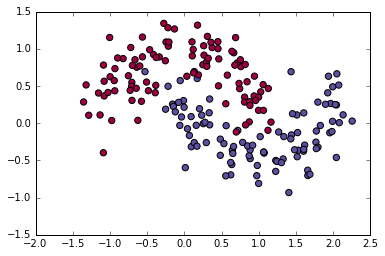

In [32]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [33]:
# Train the logistic rgeression classifier
clf = LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [34]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


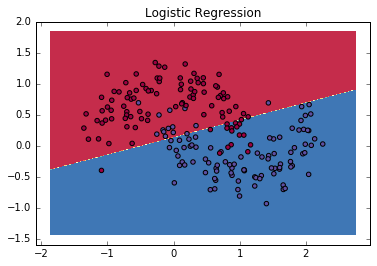

In [35]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [36]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [37]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [38]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [39]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

Loss after iteration 0: 0.567280
Loss after iteration 1000: 0.333524
Loss after iteration 2000: 0.333505
Loss after iteration 3000: 0.333489
Loss after iteration 4000: 0.333476
Loss after iteration 5000: 0.333466
Loss after iteration 6000: 0.333457
Loss after iteration 7000: 0.333450
Loss after iteration 8000: 0.333444
Loss after iteration 9000: 0.333439
Loss after iteration 10000: 0.333435
Loss after iteration 11000: 0.333432
Loss after iteration 12000: 0.333430
Loss after iteration 13000: 0.333428
Loss after iteration 14000: 0.333426
Loss after iteration 15000: 0.333424
Loss after iteration 16000: 0.333423
Loss after iteration 17000: 0.333422
Loss after iteration 18000: 0.333421
Loss after iteration 19000: 0.333421


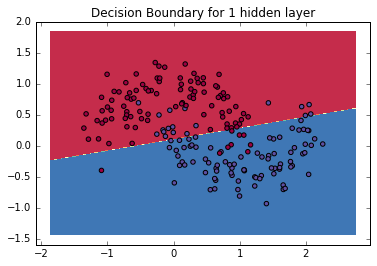

In [40]:
# Build a model with a 1-dimensional hidden layer
model = build_model(1, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for 1 hidden layer")
plt.show()

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068874
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


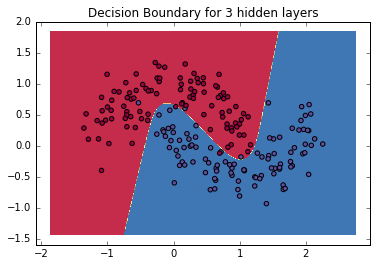

In [41]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for 3 hidden layers")
plt.show()

### Varying number of hidden layers

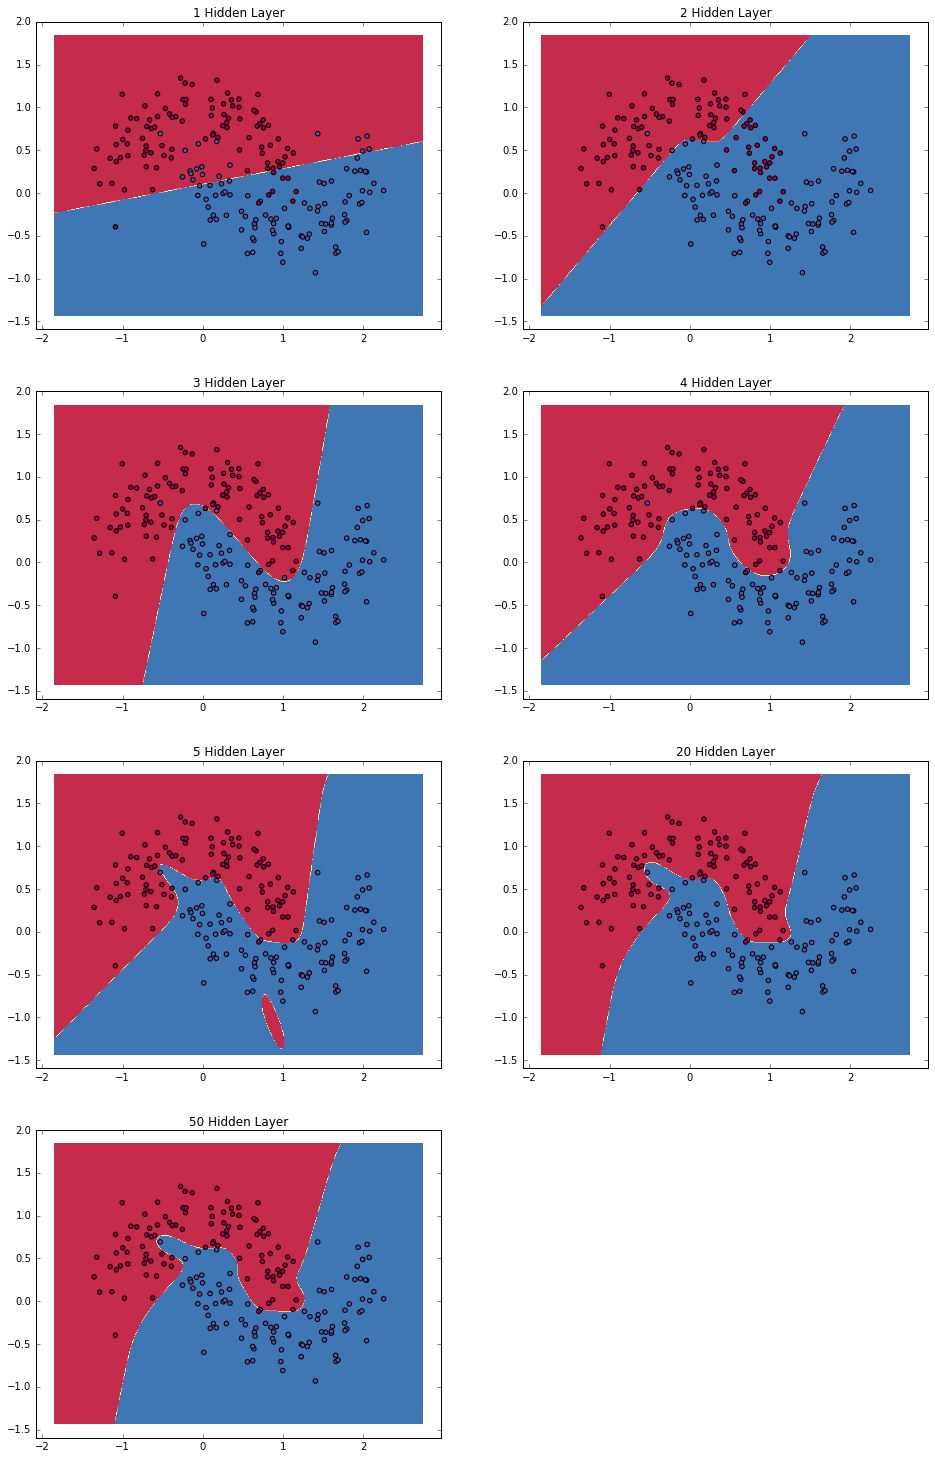

In [42]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('%d Hidden Layer' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()